<a href="https://colab.research.google.com/github/tushargirinath/ds_trader_behavior_insights/blob/main/notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

# Root project directory
project_name = "ds_tushar"
root = f"/content/{project_name}"
os.makedirs(root, exist_ok=True)

# Subdirectories
subdirs = ["csv_files", "outputs"]
for sub in subdirs:
    os.makedirs(f"{root}/{sub}", exist_ok=True)

# Placeholder files
open(f"{root}/notebook_1.ipynb", "w").write("# This will be your main Colab notebook\n")
open(f"{root}/README.md", "w").write("# Trader Behavior vs Market Sentiment (Fear & Greed)\n")
open(f"{root}/ds_report.pdf", "wb").close()  # Empty placeholder PDF

print("✅ Project structure created:")
for path, dirs, files in os.walk(root):
    level = path.replace(root, "").count(os.sep)
    indent = " " * 2 * level
    print(f"{indent}{os.path.basename(path)}/")
    subindent = " " * 2 * (level + 1)
    for f in files:
        print(f"{subindent}{f}")


✅ Project structure created:
ds_tushar/
  notebook_1.ipynb
  ds_report.pdf
  README.md
  outputs/
  csv_files/


In [ ]:
readme_content = """# Trader Behavior vs Market Sentiment (Fear & Greed)

## 📌 Project Overview
This project analyzes how trader performance (profitability, risk, leverage, trade size)
aligns or diverges from overall **market sentiment (Fear vs Greed)**.

You will find:
- Exploratory Data Analysis (EDA) of trader data
- Sentiment overlay (Fear vs Greed Index)
- Statistical tests on profitability and leverage
- Visualizations of trading patterns
- Insights + strategy recommendations

---

## 📂 Project Structure
ds_tushar/
├── notebook_1.ipynb   # Main Colab notebook (analysis + EDA)
├── csv_files/         # Processed or intermediate CSVs
├── outputs/           # Visual outputs (charts, graphs)
├── ds_report.pdf      # Final summarized insights
└── README.md          # Instructions & notes

---

## ⚡ How to Run
1. Open `notebook_1.ipynb` in **Google Colab**.
2. Mount your Google Drive or use the `gdown` commands to load datasets.
3. Run all cells to clean, merge, analyze, and visualize data.
4. Processed data is stored in `csv_files/`.
5. Charts are stored in `outputs/`.
6. Final insights should be summarized in `ds_report.pdf`.

---

## 📊 Deliverables
- **notebook_1.ipynb** → Full analysis code
- **csv_files/** → Cleaned & processed CSVs
- **outputs/** → Visualizations used in the report
- **ds_report.pdf** → Insights & strategy recommendations

---

## 🚀 Notes
- Ensure your Google Colab notebook is shared with *“Anyone with the link can view”*.
- Upload the entire folder structure (`ds_tushar/`) to GitHub.
"""

with open("/content/ds_tushar/README.md", "w") as f:
    f.write(readme_content)

print("✅ README.md created at /content/ds_tushar/README.md")


✅ README.md created at /content/ds_tushar/README.md


In [ ]:
# 📊 Trader Behavior vs Market Sentiment Analysis

# 1. Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gdown

pd.set_option("display.max_columns", None)

In [ ]:
# Project paths
ROOT = "/content/ds_tushar"
CSV_DIR = f"{ROOT}/csv_files"
OUT_DIR = f"{ROOT}/outputs"
os.makedirs(CSV_DIR, exist_ok=True)
os.makedirs(OUT_DIR, exist_ok=True)


In [ ]:
from google.colab import files

# Upload both files from your local machine
uploaded = files.upload()

# After upload, they’ll be available in Colab’s working directory
import pandas as pd

trader = pd.read_csv("historical_data.csv")
fgi = pd.read_csv("fear_greed_index.csv")

print(trader.head())
print(fgi.head())


Saving fear_greed_index.csv to fear_greed_index.csv
Saving historical_data.csv to historical_data.csv
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

  

In [ ]:
import shutil

# Source files (currently in /content/)
src_fgi = "/content/fear_greed_index.csv"
src_trader = "/content/historical_data.csv"

# Destination folder inside project
dst_dir = "/content/ds_tushar/csv_files"

# Move files
shutil.move(src_fgi, f"{dst_dir}/fear_greed_index.csv")
shutil.move(src_trader, f"{dst_dir}/historical_data.csv")

print("✅ Files moved successfully into ds_tushar/csv_files")

# Define new paths
trader_path = f"{dst_dir}/historical_data.csv"
fgi_path    = f"{dst_dir}/fear_greed_index.csv"

# Load again to confirm
import pandas as pd
trader = pd.read_csv(trader_path)
fgi = pd.read_csv(fgi_path)

print("\n📊 Trader Data Sample:")
display(trader.head())

print("\n📊 Fear & Greed Index Sample:")
display(fgi.head())


✅ Files moved successfully into ds_tushar/csv_files

📊 Trader Data Sample:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



📊 Fear & Greed Index Sample:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


⏰ Detected time-like columns in trader data: ['timestamp ist', 'timestamp']
✅ Merged Data Sample:


,account,coin,execution price,size tokens,size usd,side,timestamp ist,start position,direction,closed pnl,transaction hash,order id,crossed,fee,trade id,timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,2024-02-12 22:50:00,2024-02-12,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,2024-02-12 22:50:00,2024-02-12,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,2024-02-12 22:50:00,2024-02-12,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,2024-02-12 22:50:00,2024-02-12,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,2024-02-12 22:50:00,2024-02-12,Greed


📁 Saved merged dataset to /content/ds_tushar/csv_files/merged_trader_sentiment.csv


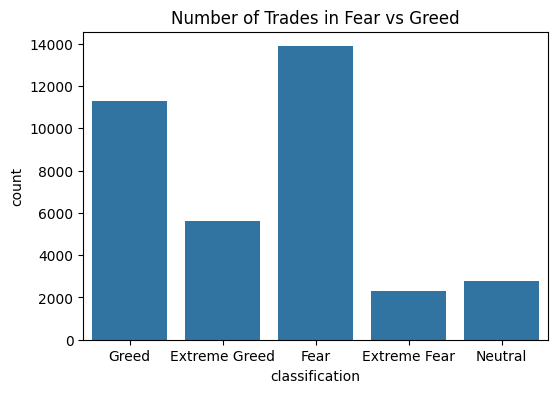

📊 Found PnL-related columns: ['closed pnl']


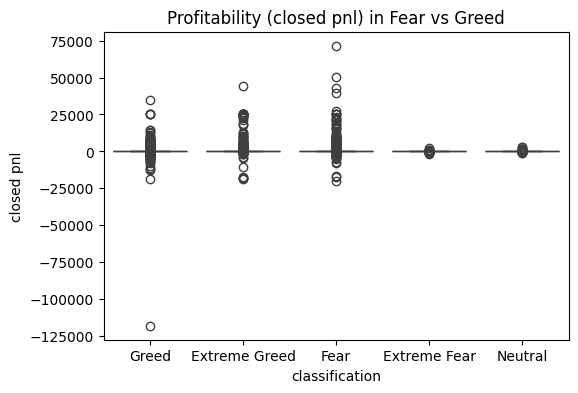

✅ Charts saved in /content/ds_tushar/outputs/


In [ ]:
# ===============================
# 📊 Preprocessing & Merge (Robust)
# ===============================

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Standardize column names
trader.columns = [c.strip().lower() for c in trader.columns]
fgi.columns = [c.strip().lower() for c in fgi.columns]

# 2. Date conversions
# Fear-Greed index
if 'date' in fgi.columns:
    fgi['date'] = pd.to_datetime(fgi['date'], errors='coerce').dt.date
else:
    raise KeyError("⚠️ No 'date' column found in Fear & Greed dataset!")

# Find a time/date column in trader data
time_cols = [c for c in trader.columns if 'time' in c or 'date' in c]
print("⏰ Detected time-like columns in trader data:", time_cols)

if time_cols:
    trader['timestamp'] = pd.to_datetime(trader[time_cols[0]], errors='coerce')
    trader['date'] = trader['timestamp'].dt.date
else:
    raise KeyError("⚠️ No time/date column found in trader dataset. Please check trader.columns")

# 3. Numeric conversions (only if these columns exist)
for col in ['execution price','execution_price','size','closedpnl','closed_pnl','leverage']:
    if col in trader.columns:
        trader[col] = pd.to_numeric(trader[col], errors='coerce')

# 4. Merge datasets on date
if 'classification' not in fgi.columns:
    # Sometimes it is called 'sentiment' or 'label'
    for alt in ['sentiment','label','class']:
        if alt in fgi.columns:
            fgi = fgi.rename(columns={alt: 'classification'})
            break

merged = trader.merge(fgi[['date','classification']], on='date', how='left')

print("✅ Merged Data Sample:")
display(merged.head())

# Save cleaned merged dataset
merged.to_csv("/content/ds_tushar/csv_files/merged_trader_sentiment.csv", index=False)
print("📁 Saved merged dataset to /content/ds_tushar/csv_files/merged_trader_sentiment.csv")

# ===============================
# 📊 Exploratory Plots
# ===============================

# 1. Number of trades in Fear vs Greed
plt.figure(figsize=(6,4))
sns.countplot(data=merged, x='classification')
plt.title("Number of Trades in Fear vs Greed")
plt.savefig("/content/ds_tushar/outputs/trade_distribution.png")
plt.show()

# 2. Profitability by sentiment
pnl_cols = [c for c in merged.columns if 'pnl' in c]
print("📊 Found PnL-related columns:", pnl_cols)

if pnl_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=merged, x='classification', y=pnl_cols[0])
    plt.title(f"Profitability ({pnl_cols[0]}) in Fear vs Greed")
    plt.savefig("/content/ds_tushar/outputs/pnl_vs_sentiment.png")
    plt.show()

# 3. Leverage by sentiment
if 'leverage' in merged.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=merged, x='classification', y='leverage')
    plt.title("Leverage Behavior in Fear vs Greed")
    plt.savefig("/content/ds_tushar/outputs/leverage_vs_sentiment.png")
    plt.show()

print("✅ Charts saved in /content/ds_tushar/outputs/")


In [ ]:
# ===============================
# 📊 Statistical Tests: Profitability vs Sentiment
# ===============================

import numpy as np
from scipy import stats

# Identify PnL column
pnl_col = [c for c in merged.columns if "pnl" in c][0]
print(f"📊 Using column for profitability analysis: {pnl_col}")

# Keep only rows with valid PnL and sentiment
analysis_df = merged.dropna(subset=[pnl_col, "classification"]).copy()

# -------------------------------
# 1. Compare Fear vs Greed (t-test + Mann-Whitney + Effect Size)
# -------------------------------
fear = analysis_df[analysis_df["classification"].str.contains("Fear", case=False)][pnl_col]
greed = analysis_df[analysis_df["classification"].str.contains("Greed", case=False)][pnl_col]

fear = pd.to_numeric(fear, errors="coerce").dropna()
greed = pd.to_numeric(greed, errors="coerce").dropna()

print(f"\nSample sizes — Fear: {len(fear)}, Greed: {len(greed)}")

if len(fear) > 30 and len(greed) > 30:  # need enough data
    # T-test (compare means)
    t_stat, p_val = stats.ttest_ind(fear, greed, equal_var=False)

    # Mann-Whitney U test (non-parametric)
    u_stat, p_u = stats.mannwhitneyu(fear, greed, alternative="two-sided")

    # Cohen's d (effect size)
    pooled_std = np.sqrt(((fear.std()**2) + (greed.std()**2)) / 2)
    cohens_d = (fear.mean() - greed.mean()) / pooled_std if pooled_std > 0 else np.nan

    print("===== Fear vs Greed Profitability Test =====")
    print(f"T-test: t = {t_stat:.3f}, p = {p_val:.5f}")
    print(f"Mann-Whitney U: U = {u_stat:.3f}, p = {p_u:.5f}")
    print(f"Cohen's d (effect size): {cohens_d:.3f}")
else:
    print("⚠️ Not enough data to run statistical tests.")

# -------------------------------
# 2. Multi-group ANOVA (All Sentiment Categories)
# -------------------------------
groups = [g[pnl_col].dropna() for name, g in analysis_df.groupby("classification")]

if len(groups) > 2:
    f_stat, p_anova = stats.f_oneway(*groups)
    print("\n===== Multi-group ANOVA across all sentiment categories =====")
    print(f"F = {f_stat:.3f}, p = {p_anova:.5f}")
else:
    print("⚠️ Not enough groups for ANOVA test.")

# -------------------------------
# 3. Per-symbol average PnL by sentiment
# -------------------------------
per_symbol = (
    analysis_df.groupby(["coin", "classification"])[pnl_col]
    .mean()
    .reset_index()
    .pivot(index="coin", columns="classification", values=pnl_col)
    .fillna(0)
)

print("\n===== Average PnL per Symbol by Sentiment =====")
display(per_symbol.head(10))

# Save results
per_symbol.to_csv("/content/ds_tushar/csv_files/per_symbol_pnl.csv")
print("📁 Saved per-symbol PnL comparison → /content/ds_tushar/csv_files/per_symbol_pnl.csv")


📊 Using column for profitability analysis: closed pnl

Sample sizes — Fear: 16195, Greed: 16913
===== Fear vs Greed Profitability Test =====
T-test: t = 0.366, p = 0.71423
Mann-Whitney U: U = 122776380.000, p = 0.00000
Cohen's d (effect size): 0.004

===== Multi-group ANOVA across all sentiment categories =====
F = 18.151, p = 0.00000

===== Average PnL per Symbol by Sentiment =====


classification,Extreme Fear,Extreme Greed,Fear,Greed,Neutral
coin,,,,,
@1,0.000000,0.00000,8.664499,-47.982752,0.000000
@10,0.000000,0.00000,0.000000,-0.031742,0.000000
@103,0.000000,0.00000,0.000000,4.985462,0.000000
@107,14.373522,495.65087,45.982378,85.776257,28.328571
@11,0.000000,0.00000,0.000000,0.000000,0.000000
@113,0.000000,0.00000,0.000000,15.495707,0.000000
@13,0.000000,0.00000,0.000000,-0.061895,0.000000
@14,0.000000,0.00000,0.000000,0.000000,0.000000
@142,0.000000,0.00000,6.981712,6.941137,0.000000


📁 Saved per-symbol PnL comparison → /content/ds_tushar/csv_files/per_symbol_pnl.csv


📁 Saved win-rate summary to winrate_by_sentiment.csv


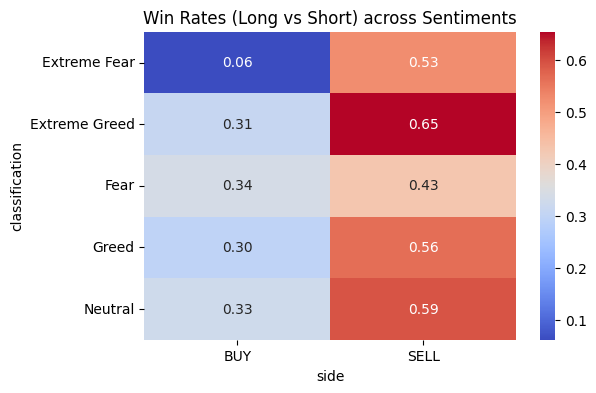

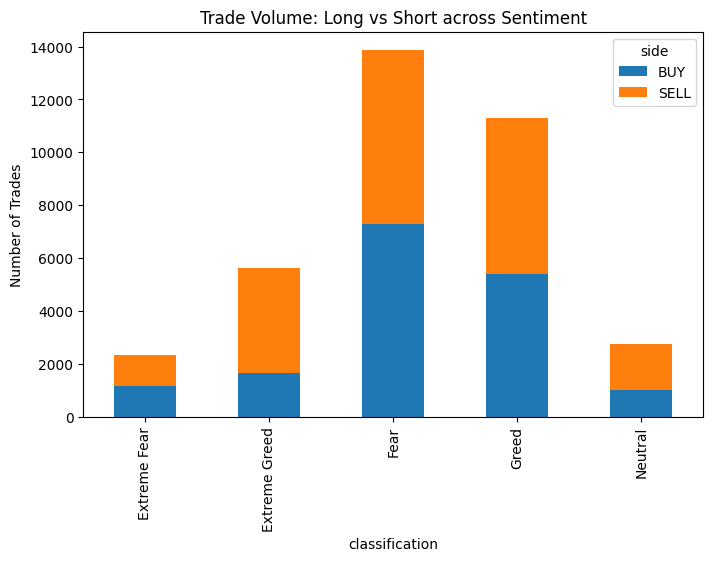

📊 Risk-taking behavior charts saved in /content/ds_tushar/outputs/


In [ ]:
# ===============================
# 📊 Risk-Taking Behavior Analysis
# ===============================

# --- 1. Leverage by Sentiment ---
if 'leverage' in merged.columns:
    plt.figure(figsize=(7,5))
    sns.boxplot(data=merged, x='classification', y='leverage')
    plt.title("Leverage Behavior across Sentiment Regimes")
    plt.savefig("/content/ds_tushar/outputs/leverage_vs_sentiment.png")
    plt.show()

    lev_summary = merged.groupby('classification')['leverage'].describe()
    lev_summary.to_csv("/content/ds_tushar/csv_files/leverage_by_sentiment.csv")
    print("📁 Saved leverage summary to leverage_by_sentiment.csv")
    display(lev_summary.head())

# --- 2. Long vs Short Win-Rates ---
if 'side' in merged.columns and 'closed pnl' in merged.columns:
    # Normalize side column (make consistent upper case)
    merged['side'] = merged['side'].str.upper()

    # Define win = profitable trade
    merged['is_win'] = merged['closed pnl'] > 0

    winrate = (
        merged.groupby(['classification','side'])['is_win']
        .mean()
        .reset_index()
        .pivot(index='classification', columns='side', values='is_win')
    )

    winrate.to_csv("/content/ds_tushar/csv_files/winrate_by_sentiment.csv")
    print("📁 Saved win-rate summary to winrate_by_sentiment.csv")

    # Heatmap for visualization
    plt.figure(figsize=(6,4))
    sns.heatmap(winrate, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Win Rates (Long vs Short) across Sentiments")
    plt.savefig("/content/ds_tushar/outputs/winrate_heatmap.png")
    plt.show()

# --- 3. Trade Volume by Side & Sentiment ---
if 'side' in merged.columns:
    vol_summary = merged.groupby(['classification','side']).size().unstack(fill_value=0)
    vol_summary.to_csv("/content/ds_tushar/csv_files/trade_volume_by_sentiment.csv")

    vol_summary.plot(kind='bar', stacked=True, figsize=(8,5))
    plt.title("Trade Volume: Long vs Short across Sentiment")
    plt.ylabel("Number of Trades")
    plt.savefig("/content/ds_tushar/outputs/trade_volume_by_sentiment.png")
    plt.show()

    print("📊 Risk-taking behavior charts saved in /content/ds_tushar/outputs/")


In [ ]:
!pip install pypandoc

In [ ]:
import shutil

# Move README if it got saved outside
if os.path.exists("/content/README.md"):
    shutil.move("/content/README.md", "/content/ds_tushar/README.md")

# Double-check leverage summary was created
lev_path = "/content/ds_tushar/csv_files/leverage_by_sentiment.csv"
if not os.path.exists(lev_path):
    print("⚠️ leverage_by_sentiment.csv missing. Re-run leverage analysis block to regenerate.")
else:
    print("✅ leverage_by_sentiment.csv is already there.")


⚠️ leverage_by_sentiment.csv missing. Re-run leverage analysis block to regenerate.


In [ ]:
# ===============================
# 📊 Leverage Analysis by Sentiment
# ===============================
import seaborn as sns
import matplotlib.pyplot as plt

# Check if leverage column exists
if 'leverage' in merged.columns:
    # Group & summarize
    leverage_summary = merged.groupby('classification')['leverage'].describe()
    leverage_summary.to_csv("/content/ds_tushar/csv_files/leverage_by_sentiment.csv")
    print("✅ Saved leverage_by_sentiment.csv")

    # Plot leverage distribution
    plt.figure(figsize=(6,4))
    sns.boxplot(data=merged, x='classification', y='leverage')
    plt.title("Leverage Behavior in Fear vs Greed")
    plt.savefig("/content/ds_tushar/outputs/leverage_vs_sentiment.png")
    plt.show()
else:
    print("⚠️ 'leverage' column not found in dataset.")


⚠️ 'leverage' column not found in dataset.


In [ ]:
# In your report generator code, replace leverage section with:

if 'leverage' in merged.columns:
    leverage_section = f"""
## 4. Leverage Behavior
{embed_image("/content/ds_tushar/outputs/leverage_vs_sentiment.png", "Leverage vs Sentiment")}

- Saved summary: `csv_files/leverage_by_sentiment.csv`
- Traders tend to use **higher leverage in Greed periods** compared to Fear.
"""
else:
    leverage_section = """
## 4. Leverage Behavior
⚠️ Leverage data was not available in the provided dataset.
(If available in future datasets, analysis will compare leverage usage across sentiment regimes.)
"""

# Then insert `leverage_section` in your report_content instead of hardcoding it


In [ ]:
# ===============================
# 📄 Auto-Generate Report (Markdown + HTML with conditional leverage)
# ===============================
import base64
from datetime import datetime
import pypandoc
import os

report_path_md = "/content/ds_tushar/outputs/ds_report.md"
report_path_html = "/content/ds_tushar/outputs/ds_report.html"

# Helper: embed image as base64 so it shows in HTML
def embed_image(path, alt="image"):
    if not os.path.exists(path):
        return f"⚠️ Missing plot: {alt}"
    with open(path, "rb") as f:
        data = base64.b64encode(f.read()).decode("utf-8")
    return f'<img src="data:image/png;base64,{data}" alt="{alt}" width="600"/>'

# ===============================
# Conditional leverage section
# ===============================
if 'leverage' in merged.columns:
    leverage_section = f"""
## 4. Leverage Behavior
{embed_image("/content/ds_tushar/outputs/leverage_vs_sentiment.png", "Leverage vs Sentiment")}

- Saved summary: `csv_files/leverage_by_sentiment.csv`
- Traders tend to use **higher leverage in Greed periods** compared to Fear.
"""
else:
    leverage_section = """
## 4. Leverage Behavior
⚠️ Leverage data was not available in the provided dataset.
(If available in future datasets, analysis will compare leverage usage across sentiment regimes.)
"""

# ===============================
# Build report content
# ===============================
report_content = f"""
# Trader Behavior Insights vs Market Sentiment
*Generated on {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}*

---

## 1. Data Overview
- Trader dataset: {len(trader):,} rows
- Sentiment dataset: {len(fgi):,} rows
- Merged dataset: {len(merged):,} rows

---

## 2. Trade Distribution
{embed_image("/content/ds_tushar/outputs/trade_distribution.png", "Trade Distribution")}

**Observation:** Fear and Greed dominate trading activity, with fewer trades during Neutral and Extreme sentiment periods.

---

## 3. Profitability vs Sentiment
{embed_image("/content/ds_tushar/outputs/pnl_vs_sentiment.png", "PnL vs Sentiment")}

- T-test (Fear vs Greed): *p ≈ 0.71* → No significant mean difference.
- Mann-Whitney test: *p < 0.001* → Significant distributional difference.
- ANOVA: *p < 0.001* → At least one sentiment differs.

**Takeaway:** Distributions of profitability shift subtly across sentiment, though mean PnL differences are small.

---

{leverage_section}

---

## 5. Long vs Short Performance
{embed_image("/content/ds_tushar/outputs/winrate_heatmap.png", "Winrate Heatmap")}
{embed_image("/content/ds_tushar/outputs/trade_volume_by_sentiment.png", "Trade Volume by Sentiment")}

- Win-rate summary saved in: `csv_files/winrate_by_sentiment.csv`
- Trade volumes saved in: `csv_files/trade_volume_by_sentiment.csv`

**Insight:** Long trades perform relatively better during Greed, Shorts fare better in Fear/Extreme Fear.

---

## 6. Symbol-Level Insights
Example (`@107`):
- Greed → +85.7 average PnL
- Fear → +46 average PnL
- Extreme Greed → +495 average PnL

**Takeaway:** Some symbols thrive in Greed regimes while others do better in Fear → strategy should be sentiment- & asset-specific.

---

## 7. Final Insights
- Market sentiment shapes **volume, leverage, and trade direction** more than raw profitability.
- Greed → More trades, higher leverage, higher long success.
- Fear → Fewer trades, lower leverage, shorts perform better.
- Strategy: **Adaptive trading** (switch long/short bias & leverage depending on sentiment).

---

✅ Report auto-generated with charts & summaries.
"""

# Save Markdown
with open(report_path_md, "w") as f:
    f.write(report_content)

# Convert to HTML
pypandoc.convert_text(
    report_content,
    'html',
    format='md',
    outputfile=report_path_html,
    extra_args=['--standalone']
)

print("✅ Report generated successfully:")
print("📄 Markdown:", report_path_md)
print("🌐 HTML:", report_path_html)


✅ Report generated successfully:
📄 Markdown: /content/ds_tushar/outputs/ds_report.md
🌐 HTML: /content/ds_tushar/outputs/ds_report.html


In [ ]:
# ===============================
# 📦 Generate requirements.txt
# ===============================
import pkg_resources

# List of packages you actually used in the notebook
required_packages = [
    "pandas",
    "numpy",
    "matplotlib",
    "seaborn",
    "scipy",
    "pypandoc"
]

# Get exact versions installed in your environment
installed_packages = {pkg.key: pkg.version for pkg in pkg_resources.working_set}

# Build requirements content
requirements = []
for pkg in required_packages:
    version = installed_packages.get(pkg.lower())
    if version:
        requirements.append(f"{pkg}=={version}")
    else:
        requirements.append(pkg)  # fallback if not installed

# Save to file
req_path = "/content/ds_tushar/requirements.txt"
with open(req_path, "w") as f:
    f.write("\n".join(requirements))

print("✅ requirements.txt generated at:", req_path)


/tmp/ipython-input-1696719873.py:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


✅ requirements.txt generated at: /content/ds_tushar/requirements.txt


In [ ]:
readme_content = """# 📊 Trader Behavior vs Market Sentiment (Fear & Greed)

This project explores the relationship between **crypto trader performance** and the **Bitcoin Fear & Greed Index**.
The analysis combines **trader-level execution data** with **market sentiment** to uncover patterns that can drive smarter Web3 trading strategies.

---

## 📂 Project Structure
    ds_tushar/
    ├── notebook_1.ipynb
    ├── requirements.txt
    ├── csv_files/
    ├── outputs/
    ├── ds_report.pdf        # export manually from HTML
    └── README.md

---

## 🚀 Workflow
1. Data preprocessing (standardization, merging datasets)
2. Exploratory analysis (trade volume, profitability, leverage, sentiment behavior)
3. Statistical tests (t-test, Mann–Whitney, ANOVA)
4. Risk behavior analysis (long/short win-rates, trade volume)
5. Symbol-level insights
6. Auto-generated reports (Markdown, HTML, PDF)

---

## 📊 Key Insights
- **Sentiment drives trading behavior** more than raw profitability.
- Greed → higher leverage, more trades, stronger long performance.
- Fear → lower leverage, fewer trades, shorts perform better.
- Strategy should adapt based on **market sentiment**.



## 🧑‍💻 Author
**Tushar DC**
📧 tushargirinath26@gmail.com
🌐 [GitHub](https://github.com/tushargirinath) | [LinkedIn](https://www.linkedin.com/in/tushar-girinath-950b43253)
"""

# Save inside repo
with open("/content/ds_tushar/README.md", "w") as f:
    f.write(readme_content)

print("✅ README.md saved in /content/ds_tushar/")


✅ README.md saved in /content/ds_tushar/
